<a href="https://colab.research.google.com/github/mikepang98/TimeSeriesLSTM/blob/main/Multivariate_Multi_Step_Medium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference : https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

Reference : https://towardsdatascience.com/predictive-analytics-time-series-forecasting-with-gru-and-bilstm-in-tensorflow-87588c852915

In [691]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pandas import DataFrame , concat
from sklearn.metrics import mean_absolute_error , mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from numpy import mean , concatenate
from math import sqrt
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf

#from google.colab import drive
#drive.mount('/content/drive')

In [692]:
#url = 'Dataset.csv'
#dataset = pd.read_csv(url)


#path='/home/marcelo/Documentos/PosGraduacaoDataScience/Disciplinas/Monografia/DadosMonografia/dados_inmet_filtrados_2020.csv'
path='dados_inmet_filtrados_2020.csv'
dataset = pd.read_csv(path)
dataset = dataset.drop(['Hora UTC'], axis=1)
dataset

,Data,PRECIPITACAO TOTAL. HORARIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB),PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),TEMPERATURA DO AR - BULBO SECO. HORARIA (Celsius),TEMPERATURA DO PONTO DE ORVALHO (Celsius),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (Celsius),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (Celsius).1,TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (Celsius),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (Celsius),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),UMIDADE RELATIVA DO AR. HORARIA (%),VENTO. DIRECAO HORARIA (gr) ((gr)),VENTO. RAJADA MAXIMA (m/s),VENTO. VELOCIDADE HORARIA (m/s);
0,2020/01/01,0.0,879.3,879.3,878.4,20.2,16.1,20.7,20.1,16.3,16.0,77.0,76.0,77.0,119.0,10.4,6.5
1,2020/01/01,0.0,880.0,880.0,879.2,19.8,15.8,20.2,19.7,16.1,15.8,79.0,77.0,78.0,92.0,9.7,4.5
2,2020/01/01,0.0,879.9,880.1,879.9,19.6,15.4,20.0,19.6,15.9,15.4,79.0,76.0,77.0,100.0,8.7,6.8
3,2020/01/01,0.0,879.7,880.0,879.6,19.2,15.1,19.6,19.1,15.4,15.1,78.0,77.0,77.0,107.0,9.4,6.3
4,2020/01/01,0.0,879.4,879.7,879.3,18.7,14.9,19.2,18.7,15.1,14.9,79.0,77.0,79.0,101.0,8.2,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020/07/27,0.0,887.4,887.7,887.4,16.6,13.4,16.8,16.1,13.6,13.3,83.0,81.0,81.0,104.0,6.3,4.6
4996,2020/07/27,0.0,886.9,887.4,886.9,16.3,13.5,16.7,16.3,13.7,13.3,83.0,81.0,83.0,105.0,7.1,5.1
4997,2020/07/27,0.0,886.7,886.9,886.6,16.2,13.6,16.5,16.1,13.7,13.5,85.0,83.0,84.0,122.0,9.6,7.1
4998,2020/07/27,0.0,886.4,886.7,886.4,16.3,13.7,16.4,16.1,13.8,13.5,85.0,84.0,85.0,125.0,9.7,7.2


In [693]:
#x_1 = dataset['TEMPERATURA DO AR - BULBO SECO. HORARIA (Celsius)']
#x_2 = dataset['TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (Celsius)']
#y = dataset['TEMPERATURA MAXIMA NA HORA ANT. (AUT) (Celsius)']

x_1 = dataset['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)']
x_2 = dataset['TEMPERATURA MAXIMA NA HORA ANT. (AUT) (Celsius)']
y = dataset['TEMPERATURA DO AR - BULBO SECO. HORARIA (Celsius)']


x_1 = x_1.values
x_2 = x_2.values
y = y.values

In [694]:
import matplotlib.pyplot as plt
import numpy as np
mu, sigma = 0, 500TEMPERATURA MAXIMA NA HORA ANT. (AUT) (Celsius)
x = np.arange(1, 5001, 1)  # x axis
z = np.random.normal(mu, sigma, len(x))  # noise
#y = x ** 2 + z # data
plt.plot(x, y, linewidth=2, linestyle="-", c="b")  # it include some noise



SyntaxError: invalid syntax (<ipython-input-694-da06d19186f9>, line 3)

In [695]:
from scipy.signal import savgol_filter
w = savgol_filter(x_1, 101, 2)

#x_1 = savgol_filter(x_1, 101, 2)
#x_2 = savgol_filter(x_2, 101, 2)
#y = savgol_filter(y, 101, 2)
#plt.plot(x, x_1, 'b')  # high frequency noise removed


In [696]:
#plt.plot(x, x_1, 'b')  # high frequency noise removed


In [697]:
#plt.plot(x, y, 'b')  # high frequency noise removed



In [698]:
x_2.size

5000

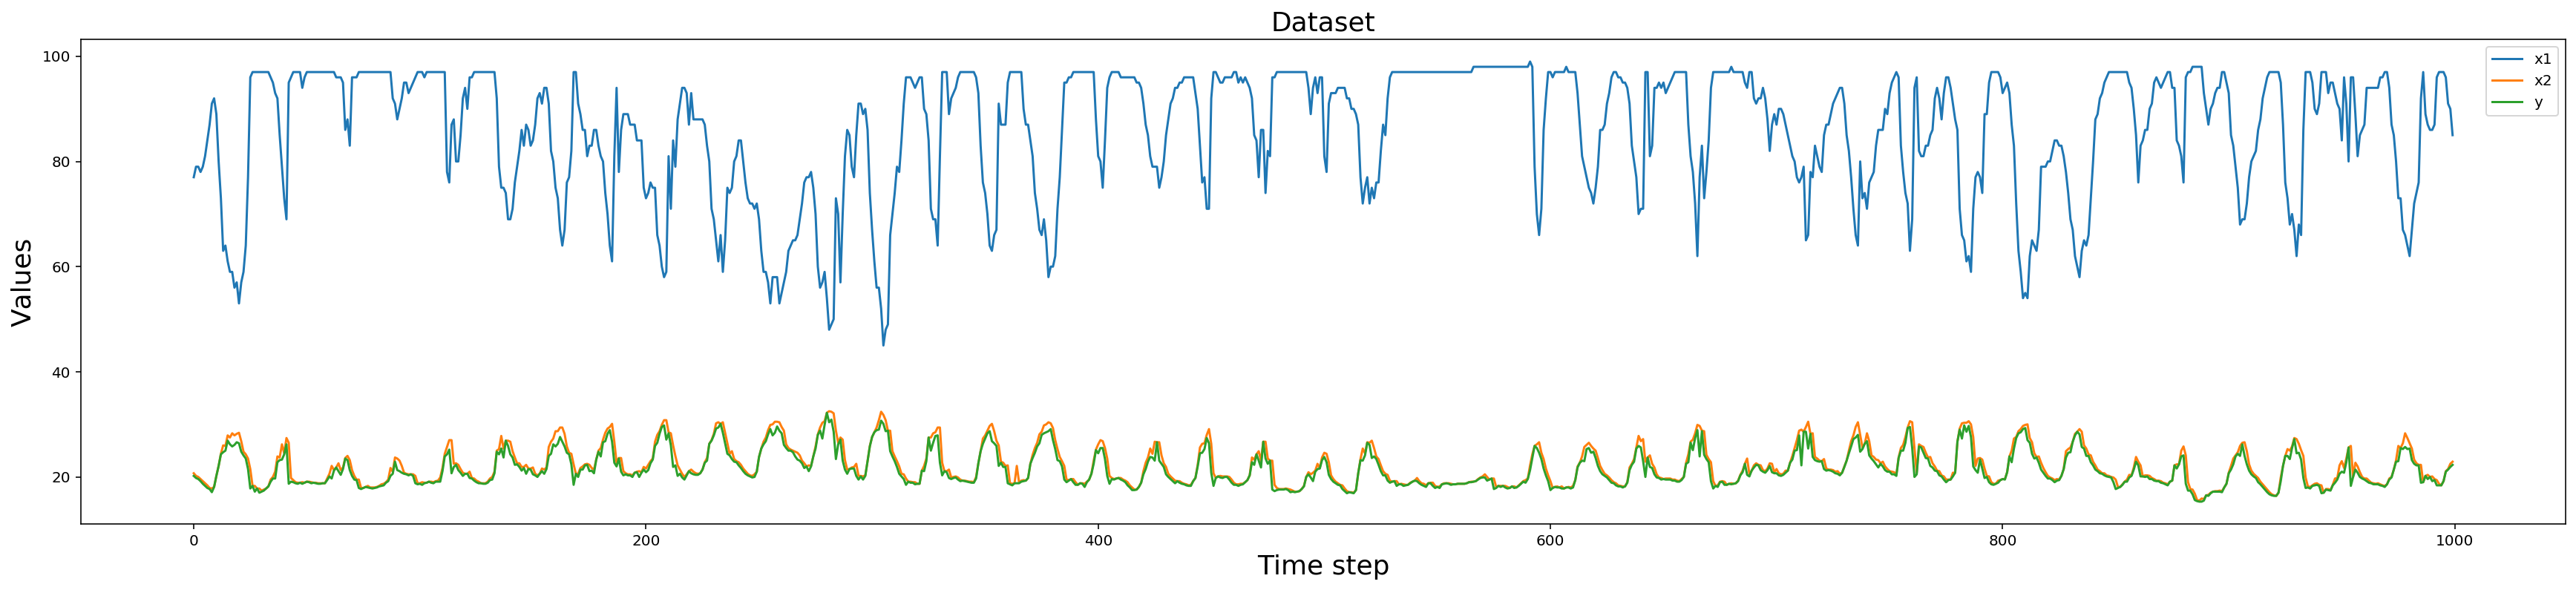

In [699]:
#default 10064
plt.figure(figsize=(30, 6))
plt.plot(x_1[:1000] , label='x1')
plt.plot(x_2[:1000] , label='x2')
plt.plot(y[:1000] , label='y')
plt.legend(loc='upper right')
plt.title("Dataset" ,  fontsize=18)
plt.xlabel('Time step' ,  fontsize=18)
plt.ylabel('Values' , fontsize=18)
plt.legend()
plt.show()

In [700]:
# convert to [rows, columns] structure
x_1 = x_1.reshape((len(x_1), 1))
x_2 = x_2.reshape((len(x_2), 1))
y = y.reshape((len(y), 1))

print ("x_1.shape" , x_1.shape) 
print ("x_2.shape" , x_2.shape) 
print ("y.shape" , y.shape) 

x_1.shape (5000, 1)
x_2.shape (5000, 1)
y.shape (5000, 1)


In [701]:
# normalization features
scaler = MinMaxScaler(feature_range=(0, 1))
x_1_scaled = scaler.fit_transform(x_1)
x_2_scaled = scaler.fit_transform(x_2)
y_scaled = scaler.fit_transform(y)

# horizontally stack columns
dataset_stacked = hstack((x_1_scaled, x_2_scaled, y_scaled))

print ("dataset_stacked.shape" , dataset_stacked.shape) 

dataset_stacked.shape (5000, 3)


In [702]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


In [703]:
# choose a number of time steps #change this accordingly
n_steps_in, n_steps_out = 96 , 12 

# covert into input/output
X, y = split_sequences(dataset_stacked, n_steps_in, n_steps_out)

print ("X.shape" , X.shape) 
print ("y.shape" , y.shape) 

X.shape (4894, 96, 2)
y.shape (4894, 12)


In [704]:
split = 4000
train_X , train_y = X[:split, :] , y[:split, :]
test_X , test_y = X[split:, :] , y[split:, :]

n_features = train_X.shape[2]


In [705]:
print ("train_X.shape" , train_X.shape) 
print ("train_y.shape" , train_y.shape) 
print ("test_X.shape" , test_X.shape) 
print ("test_y.shape" , test_y.shape) 
print ("n_features" , n_features)

train_X.shape (4000, 96, 2)
train_y.shape (4000, 12)
test_X.shape (894, 96, 2)
test_y.shape (894, 12)
n_features 2


**LSTM Model Parameter Setting**

In [706]:
#optimizer learning rate
opt = keras.optimizers.Adam(learning_rate=0.01)

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out))
model.add(Activation('linear'))
model.compile(loss='mse' , optimizer=opt , metrics=['mse'])


In [707]:
# Fit network
history = model.fit(train_X , train_y , epochs=60 , steps_per_epoch=25 , verbose=1 ,validation_data=(test_X, test_y) ,shuffle=False)


Epoch 1/60
25/25 [==============================] - 3s 101ms/step - loss: 0.1771 - mse: 0.1771 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2/60
25/25 [==============================] - 2s 93ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 3/60
25/25 [==============================] - 2s 94ms/step - loss: 0.0336 - mse: 0.0336 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 4/60
25/25 [==============================] - 2s 93ms/step - loss: 0.0440 - mse: 0.0440 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 5/60
25/25 [==============================] - 2s 93ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 6/60
25/25 [==============================] - 2s 94ms/step - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 7/60
25/25 [==============================] - 2s 93ms/step - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 8/60
25/25 [==============================] - 2s 94ms/step - loss: 0.0319 - 

Evaluation



In [715]:
# Test Data Batch 1 , Test Data Batch 2 , Test Data Batch 3
#url_test = 'Test Data Batch 1.csv'
url_test = 'ValidateData.csv'
dataset_test_ok = pd.read_csv(url_test)
dataset_test_ok.head()

,Data,Hora UTC,PRECIPITACAO TOTAL. HORARIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB),PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),TEMPERATURA DO AR - BULBO SECO. HORARIA (Celsius),TEMPERATURA DO PONTO DE ORVALHO (Celsius),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (Celsius),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (Celsius).1,TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (Celsius),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (Celsius),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),UMIDADE RELATIVA DO AR. HORARIA (%),VENTO. DIRECAO HORARIA (gr) ((gr)),VENTO. RAJADA MAXIMA (m/s),VENTO. VELOCIDADE HORARIA (m/s);
0,2020/11/29,0700 UTC,0.0,884.0,884.1,883.7,16.8,15.3,17.3,16.7,15.7,15.1,91.0,89.0,91.0,97.0,10.0,6.7
1,2020/11/29,0800 UTC,0.0,884.3,884.3,883.8,16.6,15.1,16.8,16.5,15.3,15.0,91.0,90.0,91.0,102.0,9.9,7.0
2,2020/11/29,0900 UTC,0.0,884.5,884.5,884.1,16.5,15.0,16.7,16.3,15.2,14.9,92.0,90.0,91.0,99.0,10.6,7.1
3,2020/11/29,1000 UTC,0.0,885.3,885.3,884.5,18.5,15.2,18.7,16.5,15.4,14.6,91.0,79.0,81.0,106.0,12.7,7.8
4,2020/11/29,1100 UTC,0.0,885.7,885.7,885.3,20.5,15.1,20.5,18.3,15.4,14.2,81.0,71.0,71.0,88.0,12.2,5.1


In [716]:
# read test data
x1_test = dataset_test_ok['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'].values
x2_test = dataset_test_ok['TEMPERATURA MAXIMA NA HORA ANT. (AUT) (Celsius)'].values
y_test = dataset_test_ok['TEMPERATURA DO AR - BULBO SECO. HORARIA (Celsius)'].values # no need to scale


# convert to [rows, columns] structure
x1_test = x1_test.reshape((len(x1_test), 1))
x2_test = x2_test.reshape((len(x2_test), 1))
y_test = y_test.reshape((len(y_test), 1))

x1_test_scaled = scaler.fit_transform(x1_test)
x2_test_scaled = scaler.fit_transform(x2_test)


In [717]:
def prep_data(x1_test_scaled , x2_test_scaled , y_test , start , end , last):
    #prepare test data X
    dataset_test = hstack((x1_test_scaled, x2_test_scaled))
    dataset_test_X = dataset_test[start:end, :]
    test_X_new = dataset_test_X.reshape(1, dataset_test_X.shape[0] , dataset_test_X.shape[1])

    #prepare past and groundtruth
    past_data = y_test[:end , :]
    dataset_test_y = y_test[end:last , :]
    scaler1 = MinMaxScaler(feature_range=(0, 1))
    scaler1.fit(dataset_test_y)

    # predictions
    y_pred = model.predict(test_X_new)
    y_pred_inv = scaler1.inverse_transform(y_pred)
    y_pred_inv = y_pred_inv.reshape(n_steps_out,1)
    y_pred_inv = y_pred_inv[:,0]
    
    return y_pred_inv , dataset_test_y , past_data

# Calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name , start , end):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print("Test Data from {} to {}".format(start, end))
    print('Mean Absolute Error: {:.6f}'.format(mae))
    print('Root Mean Square Error: {:.6f}'.format(rmse))
    print('')
    print('')

# Plot history and future
def plot_multistep(history, prediction1 , groundtruth , start , end):
    
    plt.figure(figsize=(20, 4))

    y_mean = mean(prediction1)

    range_history = len(history)
    range_future = list(range(range_history, range_history + len(prediction1)))

    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future, np.array(prediction1),label='Forecasted with LSTM')
    plt.plot(range_future, np.array(groundtruth),label='GroundTruth')

    plt.legend(loc='upper right')
    plt.title("Test Data from {} to {} , Mean = {:.2f}".format(start, end, y_mean) ,  fontsize=18)
    plt.xlabel('Time step' ,  fontsize=18)
    plt.ylabel('y-value' , fontsize=18)

In [718]:
# Plot history and future
def plot_multistep(history, prediction1 , groundtruth , start , end):
    plt.figure(figsize=(20, 4))
    y_mean = mean(prediction1)
    range_history = len(history)
    range_future = list(range(range_history, range_history + len(prediction1)))
    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future, np.array(prediction1),label='Forecasted with LSTM')
    plt.plot(range_future, np.array(groundtruth),label='GroundTruth')
    plt.legend(loc='upper right')
    plt.title("Test Data from {} to {} , Mean = {:.2f}".format(start, end, y_mean) ,  fontsize=18)
    plt.xlabel('Time step' ,  fontsize=18)
    plt.ylabel('y-value' , fontsize=18)

Test Data from 114 to 210
Mean Absolute Error: 0.429442
Root Mean Square Error: 0.559177


Test Data from 126 to 222
Mean Absolute Error: 1.447932
Root Mean Square Error: 1.708303


Test Data from 138 to 234
Mean Absolute Error: 1.275780
Root Mean Square Error: 1.584477




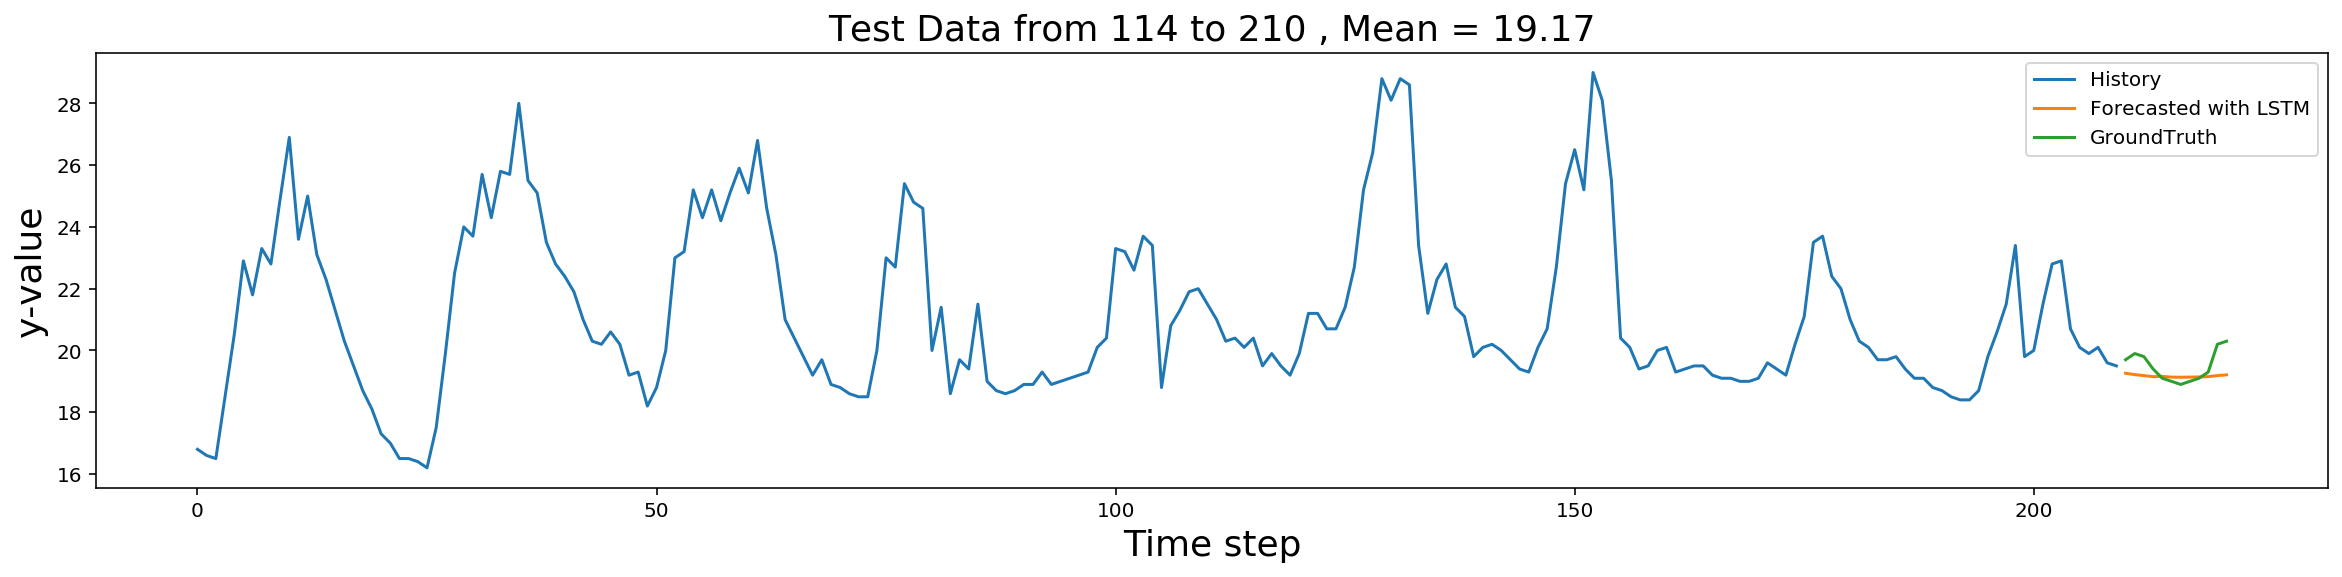

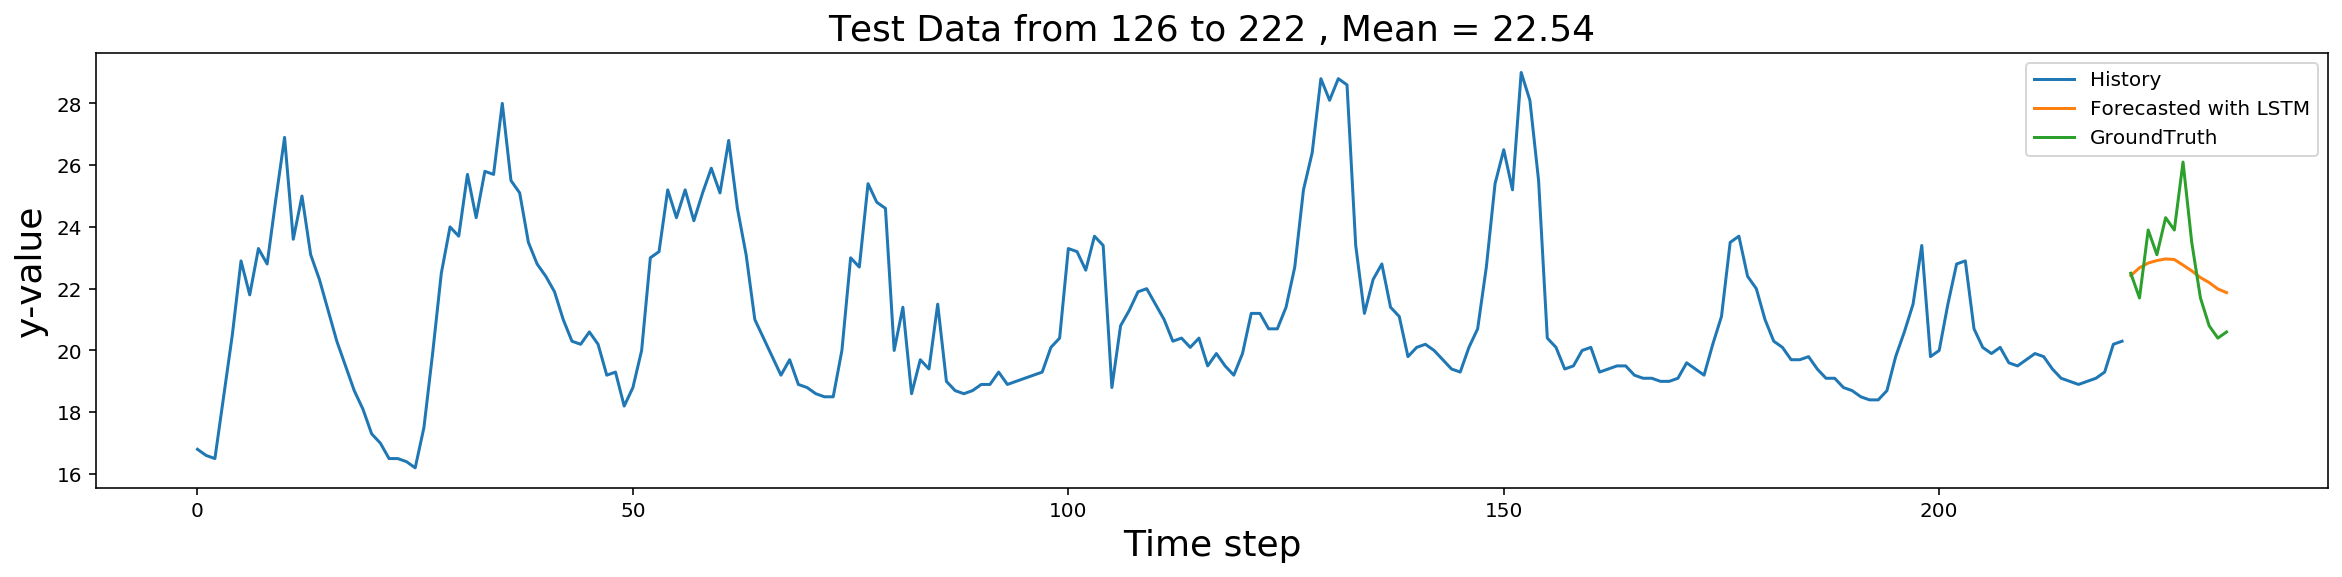

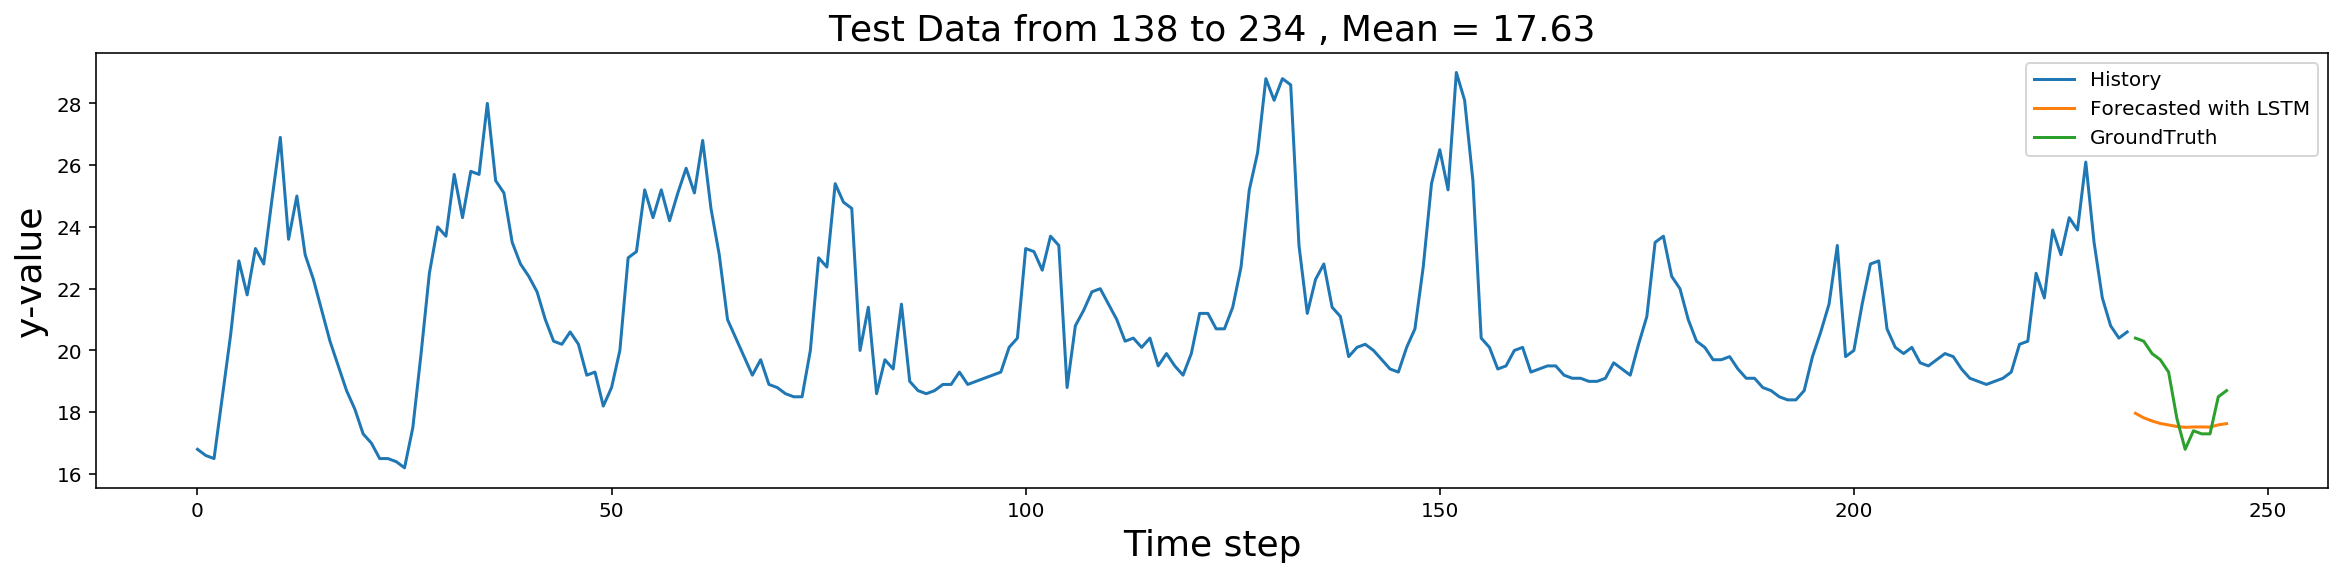

In [719]:
#for i in range(120,172,24):
for i in range(114,144,12):
    start = i
    end = start + n_steps_in 
    last = end + n_steps_out 
    y_pred_inv , dataset_test_y , past_data = prep_data(x1_test_scaled , x2_test_scaled , y_test , start , end , last) 
    evaluate_prediction(y_pred_inv , dataset_test_y, 'LSTM' , start , end) 
    plot_multistep(past_data , y_pred_inv , dataset_test_y , start , end) 


Save & Load


In [19]:
# model_url = '/Directory/Filename.h5'
# model.save(model_url)
# print("Saved")

In [20]:
# model_url = '/Directory/Filename.h5'
# model = load_model(model_url)
# print("Loaded")
# model.summary()

,y,x1,x2
0,18.8,33.14,82.84
1,18.8,33.14,82.84
2,18.8,33.14,82.84
3,18.8,33.14,82.84
4,18.8,33.14,82.84
...,...,...,...
35219,12.7,32.72,70.92
35220,12.7,32.72,70.92
35221,12.7,32.72,70.92
35222,12.7,32.72,70.92


array([17.966223, 17.81937 , 17.717693, 17.635592, 17.588057, 17.538273,
       17.511751, 17.522423, 17.524158, 17.51927 , 17.591036, 17.630888],
      dtype=float32)

In [721]:
dataset_test_y

array([[20.4],
       [20.3],
       [19.9],
       [19.7],
       [19.3],
       [17.8],
       [16.8],
       [17.4],
       [17.3],
       [17.3],
       [18.5],
       [18.7]])

In [505]:
y.size

5000

In [723]:
y_test.size

678

In [ ]:
#Aplicando o modelo de machine learning para prever as próximas 12 horas